In [36]:
import pandas as pd
df_1 = pd.read_csv("Datasets/TASK-ML-INTERN.csv")
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


In [37]:
# import numpy as np
# import pandas as pd
# 
# def msc(input_data):
#     """
#     Perform Multiplicative Signal Correction (MSC) on the input data.
#     Args:
#         input_data (pd.DataFrame): Input DataFrame with numeric columns.
#     Returns:
#         pd.DataFrame: MSC-corrected DataFrame.
#     """
#     ref_spectrum = np.mean(input_data, axis=0)
# 
#     corrected_data = np.zeros_like(input_data)
#     for i in range(input_data.shape[0]):
#         fit = np.polyfit(ref_spectrum, input_data.iloc[i, :], deg=1)
#         a, b = fit
#         corrected_data[i, :] = (input_data.iloc[i, :] - b) / a
# 
#     corrected_df = pd.DataFrame(corrected_data, columns=input_data.columns)
#     return corrected_df
# df_1.iloc[:, 1:-1] = msc(df_1.iloc[:, 1:-1])
# print(df_1.head())

In [38]:
import numpy as np
import pandas as pd
import cv2

def apply_triangle_thresholding(df):
    df_thresholded = df.copy()

    for col in df.columns[1:-1]:  # Exclude first and last columns
        # Normalize the data to 0-255 (OpenCV requires integer input)
        data = df[col].values
        data_scaled = cv2.normalize(data, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Apply Triangle Thresholding
        _, thresholded = cv2.threshold(data_scaled, 0, 255, cv2.THRESH_TRIANGLE)

        # Scale back to original range
        min_val = df[col].min()
        max_val = df[col].max()
        df_thresholded[col] = thresholded * (max_val - min_val) / 255 + min_val

    return df_thresholded

# Apply thresholding on df_1 (excluding first and last columns)
df_1.iloc[:, 1:-1] = apply_triangle_thresholding(df_1.iloc[:, 1:-1])

# Check the result
print(df_1.head())

           hsi_id         0         1         2         3         4         5  \
0  imagoai_corn_0  0.416181  0.295321  0.528774  0.282054  0.296702  0.286860   
1  imagoai_corn_1  0.415797  0.295321  0.528774  0.282054  0.511909  0.286860   
2  imagoai_corn_2  0.389023  0.295321  0.284064  0.282054  0.296702  0.286860   
3  imagoai_corn_3  0.468837  0.530168  0.528774  0.533202  0.511909  0.501786   
4  imagoai_corn_4  0.483352  0.530168  0.528774  0.533202  0.511909  0.501786   

          6         7         8  ...       439       440       441       442  \
0  0.262876  0.278523  0.255529  ...  0.562662  0.585011  0.558412  0.571735   
1  0.262876  0.278523  0.255529  ...  0.562662  0.585011  0.558412  0.571735   
2  0.262876  0.278523  0.255529  ...  0.562662  0.585011  0.558412  0.571735   
3  0.504054  0.490692  0.489272  ...  0.562662  0.585011  0.558412  0.571735   
4  0.504054  0.490692  0.489272  ...  0.940642  0.585011  0.939153  0.930366   

        443       444       445 

In [39]:
# from scipy.signal import savgol_filter
# import pandas as pd
# 
# def apply_savgol_smoothing(df, window_length=11, polyorder=3):
#     df_smoothed = df.copy()
#     for col in df.columns[1:-1]:  # Exclude first and last columns if needed
#         df_smoothed[col] = savgol_filter(df[col], window_length=window_length, polyorder=polyorder)
#     return df_smoothed
# 
# # Example Usage:
# # Apply smoothing to df_1
# df_1.iloc[:, 1:-1] = apply_savgol_smoothing(df_1.iloc[:, 1:-1])
# 
# # Check the result
# print(df_1.head())


In [40]:
df_1.columns

Index(['hsi_id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '439', '440', '441', '442', '443', '444', '445', '446', '447',
       'vomitoxin_ppb'],
      dtype='object', length=450)

In [41]:
target_variable = df_1["vomitoxin_ppb"]

In [42]:
missing_values = df_1.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [43]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [44]:
import numpy as np
df_1.replace([np.inf, -np.inf], np.nan, inplace=True)
infinite_values = (df_1 == np.inf).sum() + (df_1 == -np.inf).sum()
print(infinite_values)

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [45]:
nan_values = df_1.isna().sum()
nan_values[nan_values > 0]

Series([], dtype: int64)

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("dark")
x = df_1.iloc[:, :-1]
y = df_1.iloc[:, -1]

In [47]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.416181,0.295321,0.528774,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.704520
1,imagoai_corn_1,0.415797,0.295321,0.528774,0.282054,0.511909,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.689054
2,imagoai_corn_2,0.389023,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.665176
3,imagoai_corn_3,0.468837,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.942615,0.571767,0.577803,0.931381,0.733474
4,imagoai_corn_4,0.483352,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.938395,0.940642,0.585011,0.939153,0.930366,0.942615,0.571767,0.932812,0.931381,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.530168,0.528774,0.533202,0.511909,0.286860,0.504054,0.490692,0.489272,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.931381,0.721839
496,imagoai_corn_496,0.409367,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.646733
497,imagoai_corn_497,0.486526,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.938395,0.940642,0.585011,0.939153,0.930366,0.942615,0.571767,0.577803,0.931381,0.797187
498,imagoai_corn_498,0.464595,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.574161,0.562662,0.585011,0.939153,0.930366,0.942615,0.571767,0.577803,0.931381,0.756383


In [48]:
x

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.416181,0.295321,0.528774,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.704520
1,imagoai_corn_1,0.415797,0.295321,0.528774,0.282054,0.511909,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.689054
2,imagoai_corn_2,0.389023,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.665176
3,imagoai_corn_3,0.468837,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.942615,0.571767,0.577803,0.931381,0.733474
4,imagoai_corn_4,0.483352,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.938395,0.940642,0.585011,0.939153,0.930366,0.942615,0.571767,0.932812,0.931381,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.530168,0.528774,0.533202,0.511909,0.286860,0.504054,0.490692,0.489272,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.931381,0.721839
496,imagoai_corn_496,0.409367,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.574161,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.646733
497,imagoai_corn_497,0.486526,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.938395,0.940642,0.585011,0.939153,0.930366,0.942615,0.571767,0.577803,0.931381,0.797187
498,imagoai_corn_498,0.464595,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.574161,0.562662,0.585011,0.939153,0.930366,0.942615,0.571767,0.577803,0.931381,0.756383


In [49]:

y

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64

In [50]:
#We can simply remove the outliers but it can also lead to loss of information if some values are valid so to keep the information we will use Log transformation
import numpy as np
df_1["DON_Log"] = np.log1p(df_1["vomitoxin_ppb"] + 1e-5)

In [51]:
df_1

,hsi_id,0,1,2,3,4,5,6,7,8,...,440,441,442,443,444,445,446,447,vomitoxin_ppb,DON_Log
0,imagoai_corn_0,0.416181,0.295321,0.528774,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.704520,1100.0,7.003974
1,imagoai_corn_1,0.415797,0.295321,0.528774,0.282054,0.511909,0.286860,0.262876,0.278523,0.255529,...,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.689054,1000.0,6.908755
2,imagoai_corn_2,0.389023,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.665176,1300.0,7.170888
3,imagoai_corn_3,0.468837,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.585011,0.558412,0.571735,0.942615,0.571767,0.577803,0.931381,0.733474,1300.0,7.170888
4,imagoai_corn_4,0.483352,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.585011,0.939153,0.930366,0.942615,0.571767,0.932812,0.931381,0.751988,220.0,5.398163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.530168,0.528774,0.533202,0.511909,0.286860,0.504054,0.490692,0.489272,...,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.931381,0.721839,1200.0,7.090910
496,imagoai_corn_496,0.409367,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,...,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.646733,0.0,0.000010
497,imagoai_corn_497,0.486526,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.585011,0.939153,0.930366,0.942615,0.571767,0.577803,0.931381,0.797187,0.0,0.000010
498,imagoai_corn_498,0.464595,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,...,0.585011,0.939153,0.930366,0.942615,0.571767,0.577803,0.931381,0.756383,0.0,0.000010


In [52]:
target_col = df_1.iloc[:, -1]

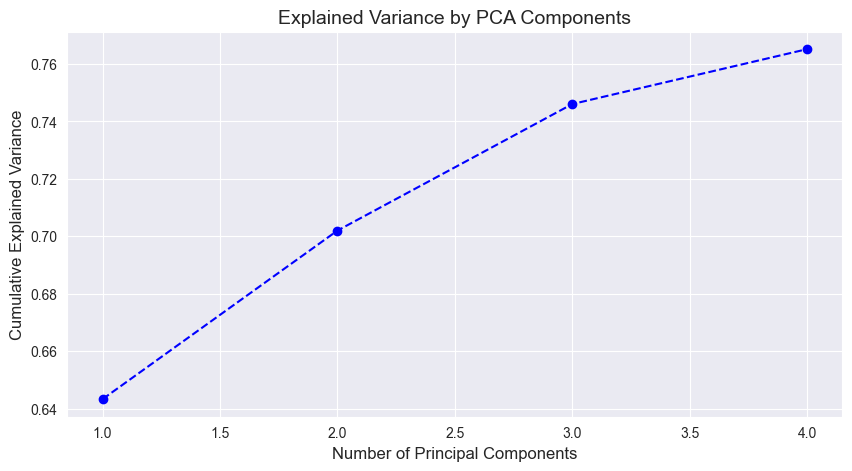

         PC1        PC2       PC3       PC4    Target
0 -18.377680   1.906719  1.155053 -0.348565  7.003974
1 -18.067796   1.456878  1.565431 -0.050984  6.908755
2 -20.431054   5.448598 -1.926288 -2.033084  7.170888
3   3.307187 -10.837278  0.888889  3.321297  7.170888
4  18.008554  -0.079247 -3.101612 -2.761001  5.398163


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
features = df_1.iloc[:, 1:-1]
target = df_1.iloc[:, -1]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
pca = PCA(n_components=4)
principal_components = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance by PCA Components', fontsize=14)
plt.grid()
plt.show()
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(4)])
pca_df['Target'] = target
print(pca_df.head())

In [54]:
pca_df["Target"] = target

In [55]:
pca_df

,PC1,PC2,PC3,PC4,Target
0,-18.377680,1.906719,1.155053,-0.348565,7.003974
1,-18.067796,1.456878,1.565431,-0.050984,6.908755
2,-20.431054,5.448598,-1.926288,-2.033084,7.170888
3,3.307187,-10.837278,0.888889,3.321297,7.170888
4,18.008554,-0.079247,-3.101612,-2.761001,5.398163
...,...,...,...,...,...
495,-7.280227,-8.289697,-2.779339,4.514039,7.090910
496,-20.268582,5.289353,-1.570758,-2.223085,0.000010
497,20.438857,2.639440,0.054405,-0.731785,0.000010
498,10.817813,-8.722446,-2.405067,-1.492694,0.000010


In [56]:
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'Target'], dtype='object')

In [57]:
from sklearn.model_selection import train_test_split
y = pca_df.Target
x = pca_df.drop(columns=['Target'])

In [58]:
x

,PC1,PC2,PC3,PC4
0,-18.377680,1.906719,1.155053,-0.348565
1,-18.067796,1.456878,1.565431,-0.050984
2,-20.431054,5.448598,-1.926288,-2.033084
3,3.307187,-10.837278,0.888889,3.321297
4,18.008554,-0.079247,-3.101612,-2.761001
...,...,...,...,...
495,-7.280227,-8.289697,-2.779339,4.514039
496,-20.268582,5.289353,-1.570758,-2.223085
497,20.438857,2.639440,0.054405,-0.731785
498,10.817813,-8.722446,-2.405067,-1.492694


In [59]:
y

0      7.003974
1      6.908755
2      7.170888
3      7.170888
4      5.398163
         ...   
495    7.090910
496    0.000010
497    0.000010
498    0.000010
499    7.244942
Name: Target, Length: 500, dtype: float64

In [60]:
x_train, x_text, y_train, y_text = train_test_split(x, y, test_size=0.2, random_state=42)

C:\Users\sreec\anaconda3\envs\ImagAI_1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.0458 - loss: 2.3223 - val_accuracy: 0.1500 - val_loss: 2.3767
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1181 - loss: 2.2436 - val_accuracy: 0.1500 - val_loss: 2.4194
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1224 - loss: 2.2453 - val_accuracy: 0.1500 - val_loss: 2.4722
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1243 - loss: 2.2301 - val_accuracy: 0.0500 - val_loss: 2.4809
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1000 - loss: 2.3524

Test Loss: 2.3524
Test Accuracy: 0.1000


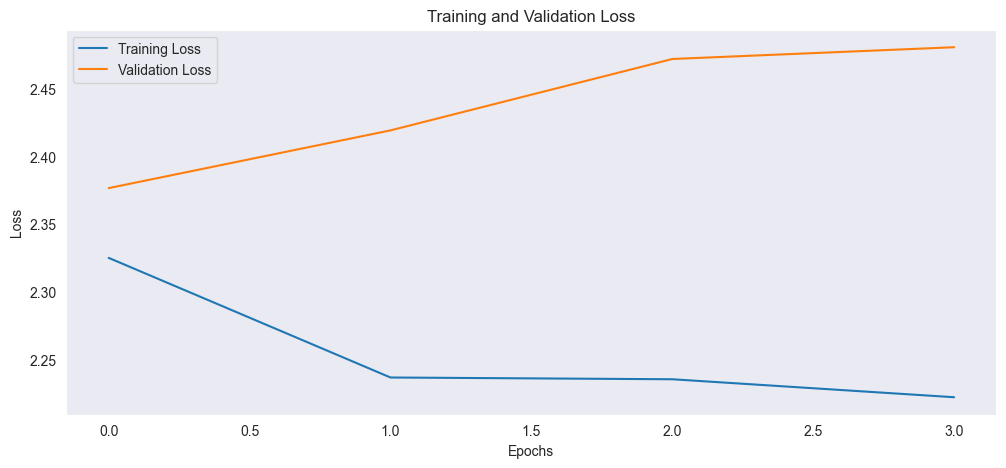

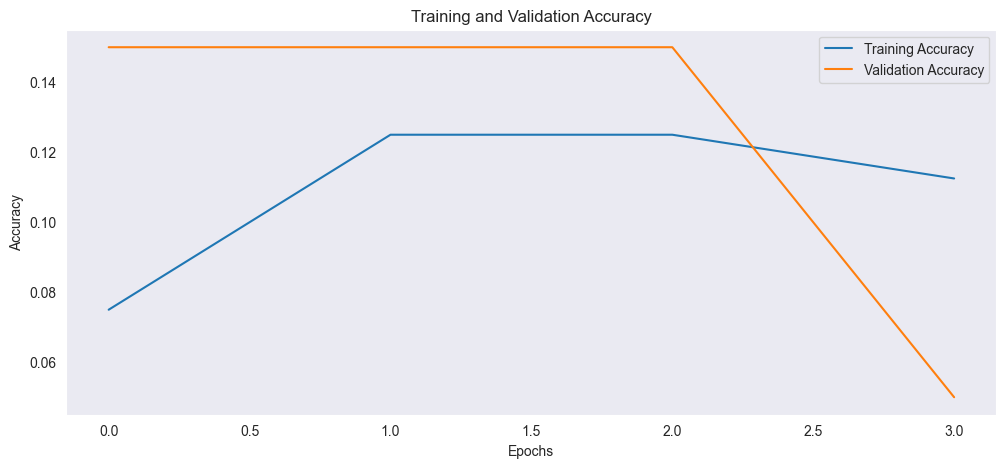


Final Validation Accuracy: 0.0500


In [72]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np
import matplotlib.pyplot as plt

# Sample data dimensions (example: 28x28 grayscale images)
input_shape = (28, 28, 1)  # Height, Width, Channels
num_classes = 10  # Example for classification (adjust as needed)

# Create CNN model
model = models.Sequential()

# Input layer + Convolution Layer 1
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# Sub-sampling Layer 1 (MaxPooling)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Convolution Layer 2
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Sub-sampling Layer 2 (MaxPooling)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected Output Layer
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))  # Output for classification

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Example data (create random data for testing)
X_train = np.random.rand(100, 28, 28, 1).astype(np.float32)
y_train = np.random.randint(0, num_classes, 100)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

X_test = np.random.rand(20, 28, 28, 1).astype(np.float32)
y_test = np.random.randint(0, num_classes, 20)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Early Stopping Callback
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs without improvement
    restore_best_weights=True,  # Restore the best weights
    verbose=1
)

# Fit model with early stopping
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Show final validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print(f"\nFinal Validation Accuracy: {val_accuracy:.4f}")


Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (None, 128)            │       355,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_14 (Sequential)      │ (None, 28, 28, 1)      │       505,217 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 861,057 (3.28 MB)

 Trainable params: 860,161 (3.28 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - loss: 8.7970 - mae: 0.3151 - val_loss: 8.5635 - val_mae: 0.2509 - learning_rate: 1.0000e-04
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8.5706 - mae: 0.3074 - val_loss: 8.3480 - val_mae: 0.2509 - learning_rate: 1.0000e-04
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 8.3494 - mae: 0.3002 - val_loss: 8.1364 - val_mae: 0.2510 - learning_rate: 1.0000e-04
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8.1327 - mae: 0.2937 - val_loss: 7.9287 - val_mae: 0.2511 - learning_rate: 1.0000e-04
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 7.9223 - mae: 0.2895 - val_loss: 7.7253 - val_mae: 0.2513 - learning_rate: 1.0000e-04
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 7.7148 - mae: 0.2840 - val_loss: 7.5262 - val_mae: 0.2514 - learning_rate: 1.0000e-04
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 7.5126 - mae: 0.2794 - val_loss: 7.3314 - val_mae: 0.2516 - learning_rate: 1.

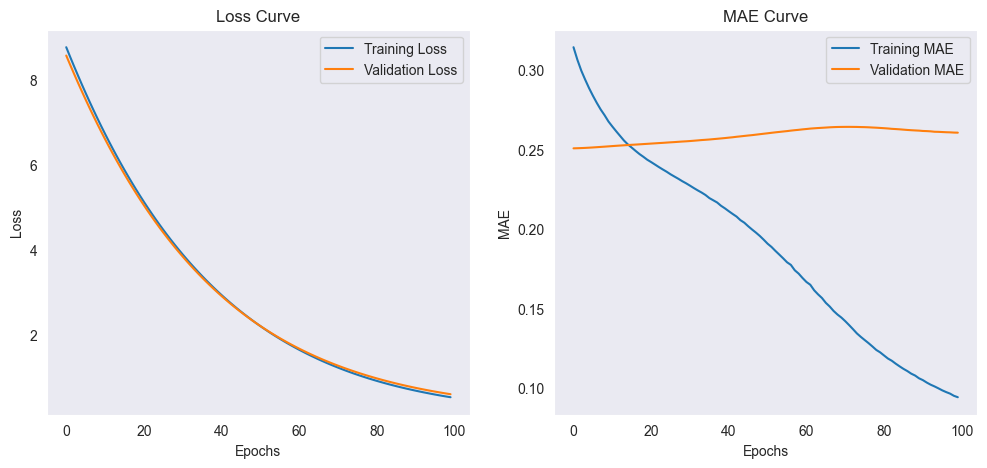

In [73]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, optimizers

# Sample data dimensions (example: 28x28 grayscale images)
input_shape = (28, 28, 1)
latent_dim = 128  # Increased latent dimension for richer representations
l2_reg = 0.01  # L2 Regularization strength

# Encoder with L2 regularization
encoder = models.Sequential([
    layers.Input(shape=input_shape),

    layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2D(128, kernel_size=(3, 3), strides=(2, 2), padding='same',
                  kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(latent_dim, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg))
])

# Decoder with L2 regularization
decoder = models.Sequential([
    layers.Input(shape=(latent_dim,)),

    layers.Dense(4 * 4 * 128, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Reshape((4, 4, 128)),

    layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=(2, 2), padding='same',
                           kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=(2, 2), padding='same',
                           kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=(2, 2), padding='same',
                           kernel_regularizer=regularizers.l2(l2_reg)),
    layers.LeakyReLU(),
    layers.BatchNormalization(),

    layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=(1, 1), padding='same',
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2_reg)),

    # Fix the size mismatch by cropping the output to (28, 28)
    layers.Cropping2D(((2, 2), (2, 2)))
])

# Full autoencoder model
inputs = layers.Input(shape=input_shape)
latent = encoder(inputs)
outputs = decoder(latent)

autoencoder = models.Model(inputs, outputs)

# Compile with reduced learning rate and Adam optimizer
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=1e-4), 
                    loss='mse', 
                    metrics=['mae'])

autoencoder.summary()

# Training with early stopping and learning rate reduction
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5, 
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5, 
    patience=3, 
    min_lr=1e-6
)

history = autoencoder.fit(
    X_train, X_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, mae = autoencoder.evaluate(X_test, X_test)
accuracy = 100 * (1 - mae)  # Accuracy estimate from MAE

print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Loss Curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot MAE Curve
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 21.3760 - mae: 0.2601 - val_loss: 11.9569 - val_mae: 0.2600
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.9731 - mae: 0.2601 - val_loss: 5.3736 - val_mae: 0.2600
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 4.4688 - mae: 0.2600 - val_loss: 2.4089 - val_mae: 0.2600
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 2.0138 - mae: 0.2599 - val_loss: 1.1209 - val_mae: 0.2600
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.9508 - mae: 0.2602 - val_loss: 0.5653 - val_mae: 0.2600
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.4909 - mae: 0.2600 - val_loss: 0.3202 - val_mae: 0.2600
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2861 - mae: 0.2600 - val_loss: 0.2068 - val_mae: 0.2600
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1901 - mae: 0.2596 - val_loss: 0.1514 - val_mae: 0.2600
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.1

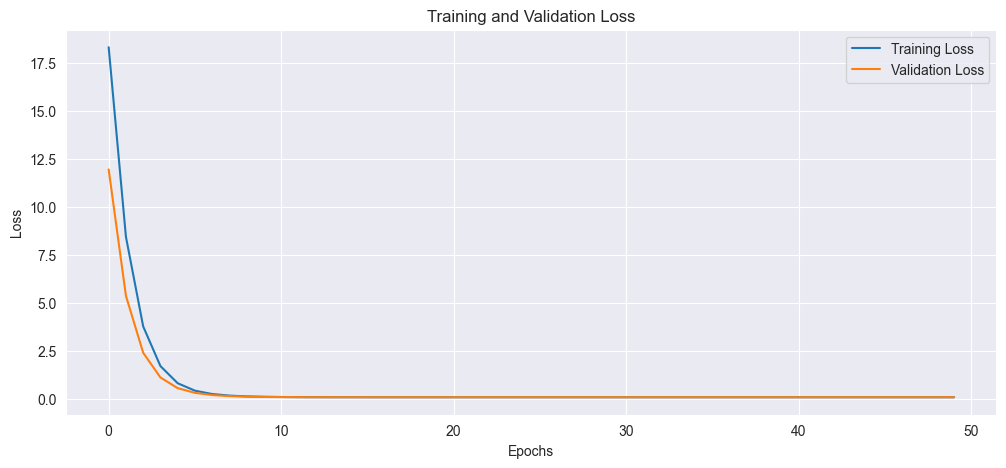

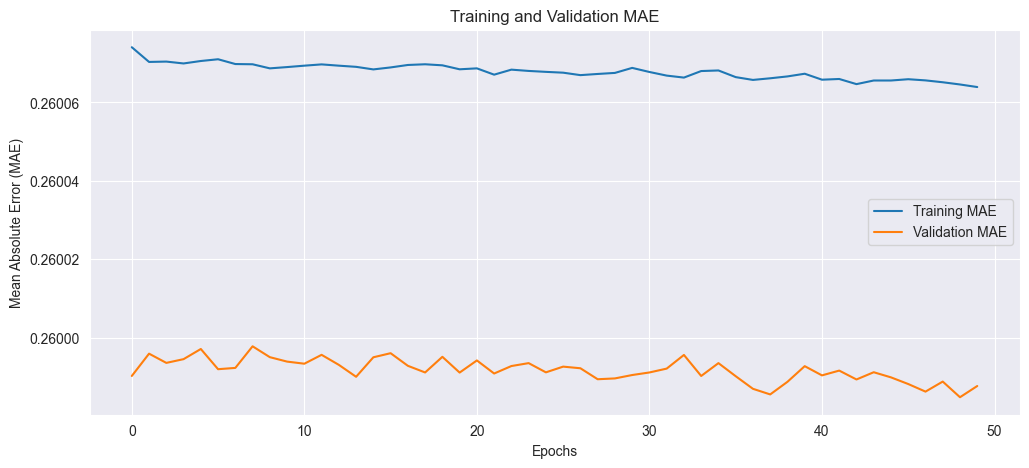

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_2 (RepeatVector)  │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 28, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 28, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 28, 28)         │         3,612 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808,214 (3.08 MB)

 Trainable params: 269,404 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,810 (2.06 MB)

In [67]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
import numpy as np
import matplotlib.pyplot as plt

# Sample data dimensions
timesteps = 28
features = 28
latent_dim = 64

# Encoder
input_layer = layers.Input(shape=(timesteps, features))
x = layers.LSTM(128, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=True)(input_layer)
x = layers.LSTM(64, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=False)(x)
encoded = layers.Dense(latent_dim, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)

# Decoder
x = layers.RepeatVector(timesteps)(encoded)
x = layers.LSTM(64, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=True)(x)
x = layers.LSTM(128, activation='relu', kernel_regularizer=regularizers.l2(0.05), return_sequences=True)(x)
decoded = layers.TimeDistributed(layers.Dense(features, activation='sigmoid'))(x)

# Create autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Create example data + Add noise
X_train = np.random.rand(1000, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (1000, timesteps, features))
X_test = np.random.rand(200, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (200, timesteps, features))

# Train model
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate model
loss, mae = autoencoder.evaluate(X_test, X_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Accuracy calculation
accuracy = (1 - mae / np.max(X_test)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot training & validation MAE
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()

# Model summary
autoencoder.summary()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - loss: 0.1104 - mae: 0.2771 - val_loss: 0.0938 - val_mae: 0.2604
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0937 - mae: 0.2605 - val_loss: 0.0933 - val_mae: 0.2599
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0934 - mae: 0.2602 - val_loss: 0.0933 - val_mae: 0.2599
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0935 - mae: 0.2604 - val_loss: 0.0933 - val_mae: 0.2599
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0934 - mae: 0.2601 - val_loss: 0.0933 - val_mae: 0.2599
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0936 - mae: 0.2604 - val_loss: 0.0933 - val_mae: 0.2599
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0935 - mae: 0.2603 - val_loss: 0.0933 - val_mae: 0.2599
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0934 - mae: 0.2600 - val_loss: 0.0933 - val_mae: 0.2599
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0

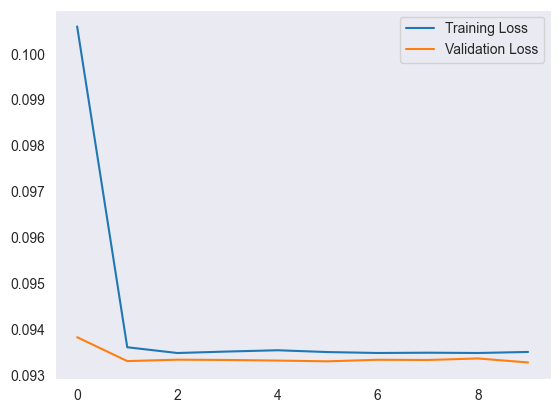

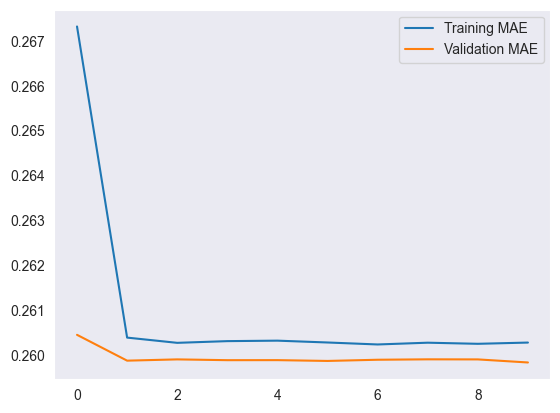

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23      │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 28, 28)    │     29,468 │ input_layer_23[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 28, 28)    │         56 │ multi_head_atten… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 28, 28)    │          0 │ layer_normalizat… │
│                     │                   │            │ input_layer_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 28, 128)   │      3,712 │ add_8[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 28, 28)    │      3,612 │ dense_54[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 28, 28)    │          0 │ dense_55[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 28, 28)    │          0 │ dropout_11[0][0], │
│                     │                   │            │ add_8[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 28, 28)    │         56 │ add_9[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 28, 28)    │     29,468 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 28, 28)    │         56 │ multi_head_atten… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 28, 28)    │          0 │ layer_normalizat… │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 28, 128)   │      3,712 │ add_10[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 28, 28)    │      3,612 │ dense_56[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 28, 28)    │          0 │ dense_57[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_11 (Add)        │ (None, 28, 28)    │          0 │ dropout_13[0][0], │
│                     │                   │            │ add_10[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 28, 28)    │         56 │ add_11[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 28)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                 

 Total params: 731,654 (2.79 MB)

 Trainable params: 243,884 (952.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 487,770 (1.86 MB)

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model, Input

# Transformer Encoder Layer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = layers.Dense(ff_dim, activation="relu")(res)
    x = layers.Dense(inputs.shape[-1])(x)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + res)
    return x

# Transformer Decoder Layer
def transformer_decoder(inputs, encoder_output, head_size, num_heads, ff_dim, dropout=0):
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, encoder_output)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)

    x = layers.Dense(ff_dim, activation="relu")(x)
    x = layers.Dense(inputs.shape[-1])(x)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x + inputs)
    return x

# Data dimensions
timesteps = 28
features = 28
latent_dim = 64

# Encoder
input_layer = Input(shape=(timesteps, features))
x = transformer_encoder(input_layer, head_size=64, num_heads=4, ff_dim=128)
x = transformer_encoder(x, head_size=64, num_heads=4, ff_dim=128)

# Pooling to reduce dimensions to (batch_size, latent_dim)
x = layers.GlobalAveragePooling1D()(x)

# Bottleneck Layer
encoded = layers.Dense(latent_dim, activation='relu')(x)

# Decoder
x = layers.RepeatVector(timesteps)(encoded)  # Now the input is (batch_size, latent_dim) which is correct!
x = transformer_decoder(x, x, head_size=64, num_heads=4, ff_dim=128)
x = transformer_decoder(x, x, head_size=64, num_heads=4, ff_dim=128)

# Output Layer
decoded = layers.TimeDistributed(layers.Dense(features, activation='sigmoid'))(x)

# Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Sample Data
X_train = np.random.rand(1000, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (1000, timesteps, features))
X_test = np.random.rand(200, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (200, timesteps, features))

# Train
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, mae = autoencoder.evaluate(X_test, X_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.legend()
plt.show()

# Summary
autoencoder.summary()

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 8.3647 - mae: 0.2598 - val_loss: 1.3163 - val_mae: 0.2601
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.8874 - mae: 0.2595 - val_loss: 0.2857 - val_mae: 0.2601
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.2289 - mae: 0.2600 - val_loss: 0.1312 - val_mae: 0.2601
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.1202 - mae: 0.2600 - val_loss: 0.1013 - val_mae: 0.2601
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0990 - mae: 0.2598 - val_loss: 0.0955 - val_mae: 0.2601
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0947 - mae: 0.2597 - val_loss: 0.0941 - val_mae: 0.2601
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0936 - mae: 0.2597 - val_loss: 0.0937 - val_mae: 0.2601
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0932 - mae: 0.2596 - val_loss: 0.0935 - val_mae: 0.2601
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.093

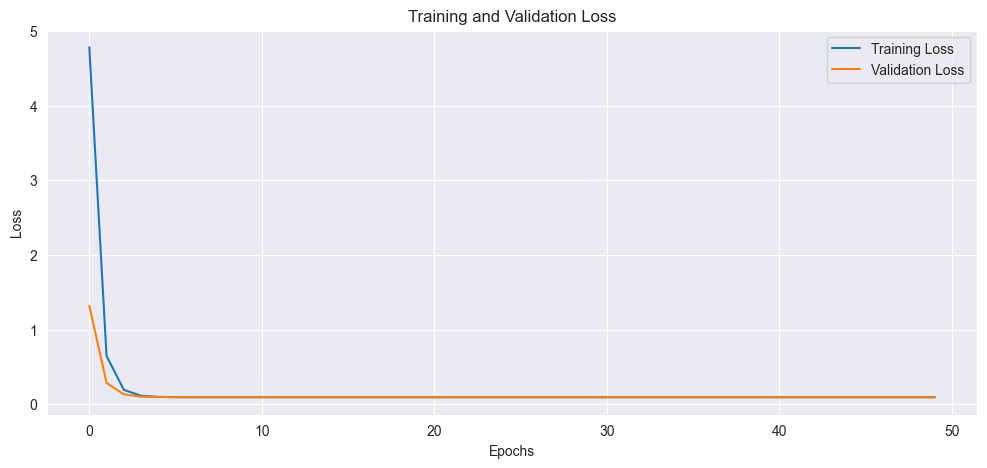

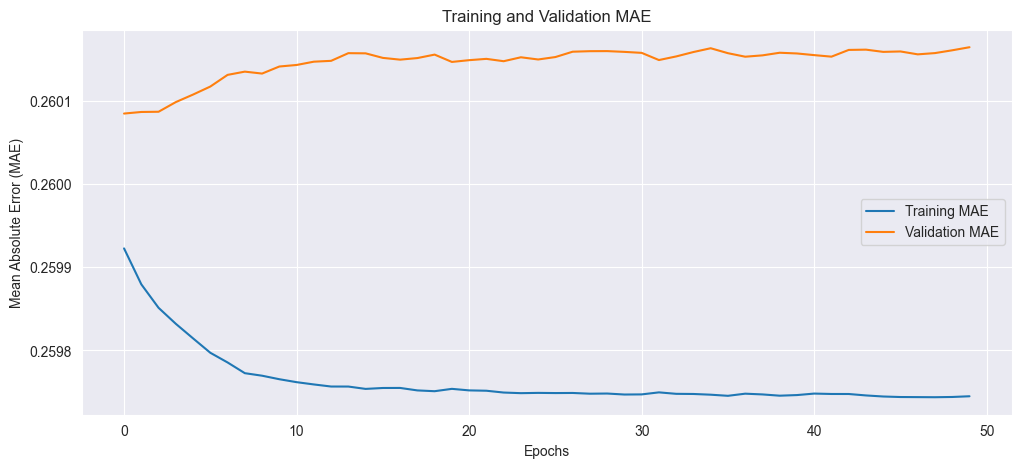

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 28, 28,    │        320 │ input_layer_24[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 28, 28,    │        832 │ input_layer_24[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 28, 28,    │     18,496 │ conv2d_24[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 28, 28,    │     51,264 │ conv2d_26[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 14, 14,    │          0 │ conv2d_25[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 14, 14,    │          0 │ conv2d_27[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 14, 14,    │          0 │ max_pooling2d_8[… │
│ (Concatenate)       │ 128)              │            │ max_pooling2d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 25088)     │          0 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 128)       │  3,211,392 │ flatten_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 128)       │          0 │ dense_64[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 784)       │    101,136 │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_6 (Reshape) │ (None, 28, 28)    │          0 │ dense_65[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 10,150,322 (38.72 MB)

 Trainable params: 3,383,440 (12.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,766,882 (25.81 MB)

In [69]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
import numpy as np
import matplotlib.pyplot as plt

# Sample data dimensions
timesteps = 28
features = 28
channels = 1
input_shape = (timesteps, features, channels)

# Input layer
input_layer = layers.Input(shape=input_shape)

# Branch 1
x1 = layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(input_layer)
x1 = layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(x1)
x1 = layers.MaxPooling2D((2, 2))(x1)

# Branch 2
x2 = layers.Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(input_layer)
x2 = layers.Conv2D(64, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.05), padding='same')(x2)
x2 = layers.MaxPooling2D((2, 2))(x2)

# Merge branches
merged = layers.Concatenate()([x1, x2])
x = layers.Flatten()(merged)
x = layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(timesteps * features, activation='sigmoid')(x)
output = layers.Reshape((timesteps, features))(output)

# Create 2BCNN model
model = Model(inputs=input_layer, outputs=output)

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Create example data + Add noise
X_train = np.random.rand(1000, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (1000, timesteps, features))
X_test = np.random.rand(200, timesteps, features).astype(np.float32) + np.random.normal(0, 0.1, (200, timesteps, features))

# Reshape to match CNN input shape (add channel dimension)
X_train = X_train.reshape(-1, timesteps, features, 1)
X_test = X_test.reshape(-1, timesteps, features, 1)

# Train model
history = model.fit(
    X_train, X_train.reshape(-1, timesteps, features),
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate model
loss, mae = model.evaluate(X_test, X_test.reshape(-1, timesteps, features))
print(f"\nTest Loss: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Accuracy calculation
accuracy = (1 - mae / np.max(X_test)) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

# Plot training & validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()

model.summary()